<a href="https://colab.research.google.com/github/JonathanItha/Sectors_RandForest/blob/main/Sectors_RandForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#The  Goal of this code is to determine wich sectors can better predict the future movement of other sectors by using a random forest classifier

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [151]:
import yfinance as yf

In [152]:
until = '2023-01-01'
start = '2000-01-01'

sectors = {
'energy' : yf.download('^GSPE' , end=until , start=start),
'finance' : yf.download('^SP500-40' , end=until , start=start ),
'health' : yf.download('^SP500-35', end=until , start=start) ,
'tech' : yf.download('^SP500-45', end=until , start=start),
'discr' : yf.download('^SP500-25', end=until , start=start),
'staples' : yf.download('^SP500-30', end=until , start=start),
'commu' : yf.download('^SP500-50', end=until , start=start),
'estate' : yf.download('^SP500-60' , end=until, start=start) ,
'mat' : yf.download('^SP500-15', end=until, start=start)
}


#not found 'estate' : yf.download('^SP500-60' , end=until) , 'mat' : yf.download('^SP500-15', end=until),
'''
for sector, data in sectors.items():
    if data.empty:
        print(f"No data found for {sector}")
    else:
        if 'Close' in data.columns:
            data['Close'].plot(figsize=(14, 7))
            plt.title(f'{sector} Closing Price')
            plt.show()  # This ensures each plot is shown separately
        else:
            print(f"No 'Close' column found in data for {sector}")

'''

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


'\nfor sector, data in sectors.items():\n    if data.empty:\n        print(f"No data found for {sector}")\n    else:\n        if \'Close\' in data.columns:\n            data[\'Close\'].plot(figsize=(14, 7))\n            plt.title(f\'{sector} Closing Price\')\n            plt.show()  # This ensures each plot is shown separately\n        else:\n            print(f"No \'Close\' column found in data for {sector}")\n\n'

In [153]:
print(sectors['energy'].columns)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [154]:
#Try to predict if the price will go up or down

for sector, data in sectors.items() :
  data['Tomorrow'] = data['Close'].shift(-1)

In [155]:
print(sectors['finance'])

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2000-01-03  307.200012  307.200012  307.200012  307.200012  307.200012   
2000-01-04  294.540009  294.540009  294.540009  294.540009  294.540009   
2000-01-05  292.559998  292.559998  292.559998  292.559998  292.559998   
2000-01-06  304.089996  304.089996  304.089996  304.089996  304.089996   
2000-01-07  310.730011  310.730011  310.730011  310.730011  310.730011   
...                ...         ...         ...         ...         ...   
2022-12-23  562.429993  566.469971  559.580017  565.890015  565.890015   
2022-12-27  565.890015  568.039978  563.159973  565.700012  565.700012   
2022-12-28  565.700012  567.840027  562.869995  563.330017  563.330017   
2022-12-29  563.330017  572.000000  563.330017  571.409973  571.409973   
2022-12-30  571.409973  571.409973  564.890015  569.739990  569.739990   

               Volume    Tomorrow  
D

In [156]:
#drop the volume because it contains a lot of 0 value

for sector, data in sectors.items() :
  data = data.drop('Volume' , axis=1)

In [157]:
#adding the vix index and drop the tomorrow col

vix = yf.download('^VIX', start=start , end=until )

for sector, data in sectors.items():
    # Assuming 'Date' is the index and it's in datetime format
    if not isinstance(data.index, pd.DatetimeIndex):
        data.index = pd.to_datetime(data.index)

def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()

    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def calculate_macd(data, slow=26, fast=12, smooth=9):
    ema_fast = data.ewm(span=fast, adjust=False).mean()
    ema_slow = data.ewm(span=slow, adjust=False).mean()
    macd = ema_fast - ema_slow
    return macd

for sector, data in sectors.items() :
  data['Target'] = (data['Tomorrow'] > data['Close']).astype(int)
  data['vix'] = vix['Close']
  data['Weekday'] = data.index.weekday + 1
  data['RSI'] = calculate_rsi(data['Close'])
  data['MACD'] = calculate_macd(data['Close'])
  data['Return'] = data['Close'].pct_change()

print(sectors['finance']['vix'])

[*********************100%%**********************]  1 of 1 completed


Date
2000-01-03    24.209999
2000-01-04    27.010000
2000-01-05    26.410000
2000-01-06    25.730000
2000-01-07    21.719999
                ...    
2022-12-23    20.870001
2022-12-27    21.650000
2022-12-28    22.139999
2022-12-29    21.440001
2022-12-30    21.670000
Name: vix, Length: 5784, dtype: float64


In [158]:
print(sectors['energy'])

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2000-01-03  206.580002  206.580002  206.580002  206.580002  206.580002   
2000-01-04  202.380005  202.380005  202.380005  202.380005  202.380005   
2000-01-05  208.559998  208.559998  208.559998  208.559998  208.559998   
2000-01-06  218.139999  218.139999  218.139999  218.139999  218.139999   
2000-01-07  220.850006  220.850006  220.850006  220.850006  220.850006   
...                ...         ...         ...         ...         ...   
2022-12-23  647.840027  668.400024  647.840027  668.330017  668.330017   
2022-12-27  668.330017  678.270020  668.330017  675.960022  675.960022   
2022-12-28  675.960022  675.960022  658.539978  660.950012  660.950012   
2022-12-29  660.950012  670.260010  658.299988  667.270020  667.270020   
2022-12-30  667.270020  673.250000  664.619995  672.340027  672.340027   

               Volume    Tomorrow  Ta

In [159]:
for sector, data in sectors.items() :
  data = data.drop('Tomorrow' , axis=1)

In [160]:
energy = sectors['energy']
finance = sectors['finance']
health = sectors['health']
tech = sectors['tech']
discr = sectors['discr']
staples = sectors['staples']
commu = sectors['commu']
estate = sectors['estate']
mat = sectors['mat']


#Fist step
To find which sector the test model is the most efficeint.

In [161]:
#ain the model

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score , accuracy_score

model = RandomForestClassifier(n_estimators=100 , min_samples_split=10, random_state=42  )


In [162]:
def train_test_model(data) :
  hs = [2 , 5 , 60 , 250]

  for h in hs :
    rol_av = data.rolling(h).mean()
    mean_col = f'Close_Mean_{h}'
    data[mean_col] = rol_av['Return']

    stand_dev = data.rolling(h).std()
    st_col = f'Stand_dev_{h}'
    data[st_col] = stand_dev['Return']


  new_var = ['Open', 'High', 'Low', 'Close', 'vix', 'Weekday', 'RSI', 'MACD', 'Return', 'Close_Mean_2',
       'Stand_dev_2', 'Close_Mean_5', 'Stand_dev_5', 'Close_Mean_60',
       'Stand_dev_60', 'Close_Mean_250', 'Stand_dev_250']

  data = data.dropna()

  train = data.iloc[:-250]
  test = data.iloc[-250 :]


  fig , ax = plt.subplots(figsize=(14, 7))
  train['Close'].plot(ax=ax , label='train')
  test['Close'].plot(ax=ax , label='test')
  plt.title('Closing Price')
  ax.legend()
  plt.show()

  data['Return'].plot(figsize=(14, 7))
  plt.ylabel('Return')
  plt.xlabel('Date')
  plt.title('Return')
  plt.show()

  model.fit(train[new_var] , train['Target'])

  pred = model.predict_proba(test[new_var])[: , 1]
  pred[pred >= 0.6] = 1
  pred[pred < 0.6] = 0

  pred = pd.Series(pred , index=test.index)

  feature_importances = model.feature_importances_
  importances_df = pd.DataFrame({'feature': new_var, 'importance': feature_importances})
  importances_df = importances_df.sort_values(by='importance', ascending=False)
  plt.figure(figsize=(10, 6))
  plt.barh(importances_df['feature'], importances_df['importance'])
  plt.xlabel('Importance')
  plt.ylabel('Feature')
  plt.title('Feature Importance')
  plt.gca().invert_yaxis()
  plt.show()

  matcorr = data[new_var]

  corr = matcorr.corr()
  plt.figure(figsize=(10, 8))
  sns.heatmap(corr, annot=False )
  plt.title('Correlation Matrix')
  plt.show()

  preci_score = precision_score(test['Target'] , pred )
  acc = accuracy_score(test['Target'] , pred)

  real = test['Target'].sum()
  trad = pred.sum()

  return  print(f'real number of days up {real}')  ,  print(f'predicted day up : {trad}') , print(f'precision score : {preci_score}') , print(f'Accuracy : {acc}')

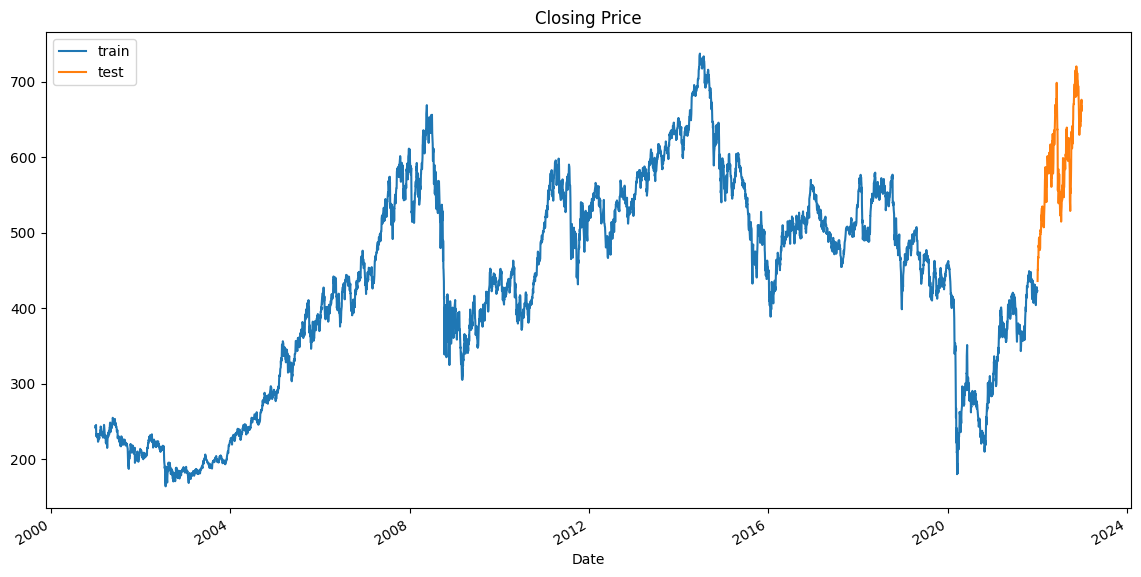

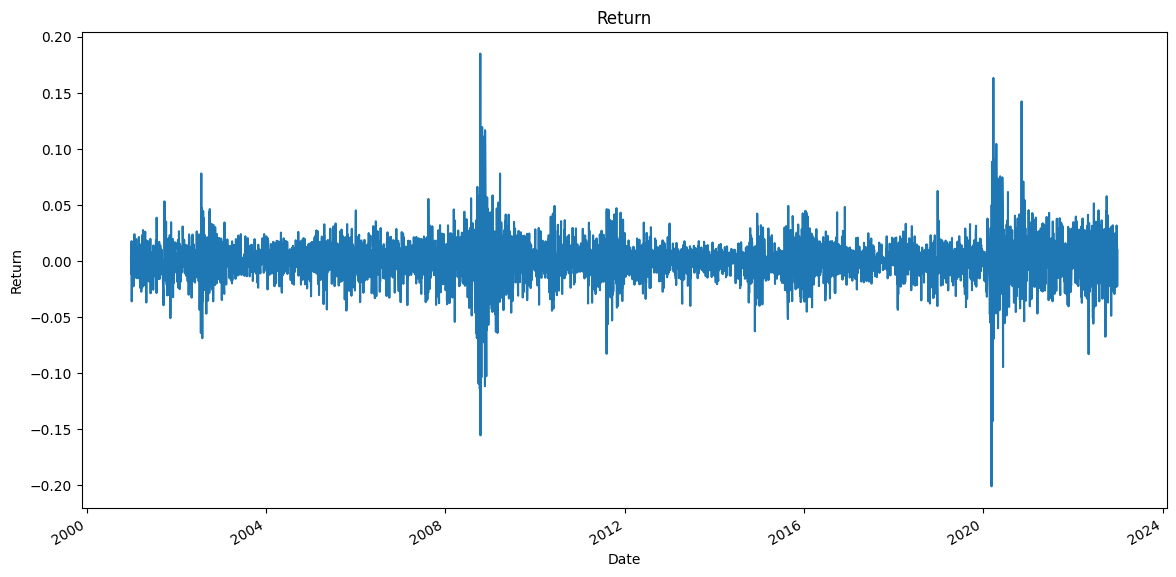

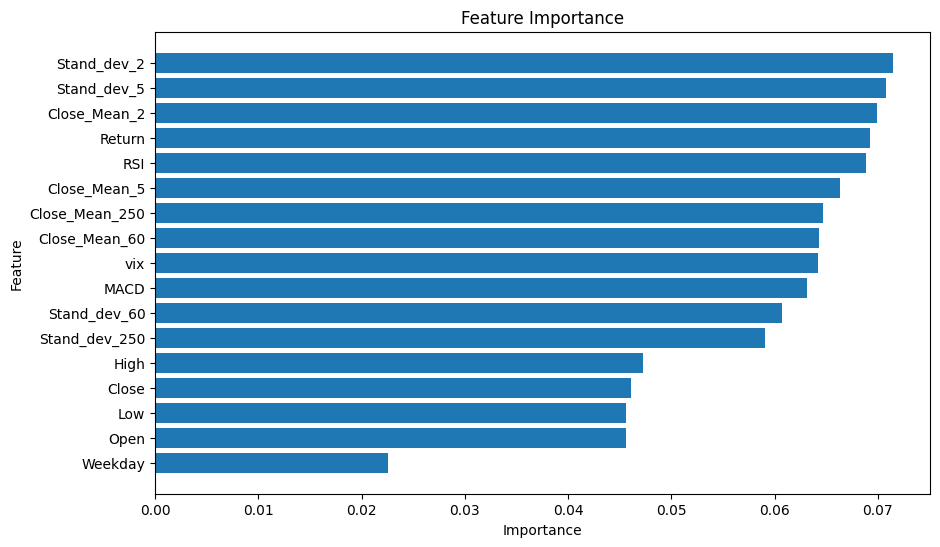

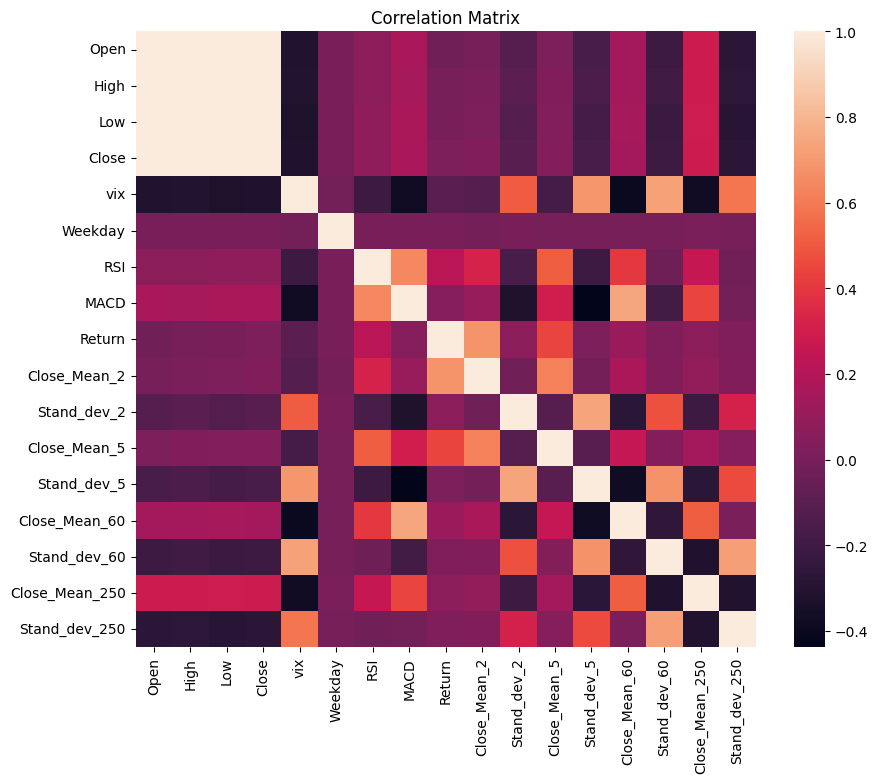

real number of days up 141
predicted day up : 5.0
precision score : 0.6
Accuracy : 0.44


In [163]:
energy_model = train_test_model(energy)

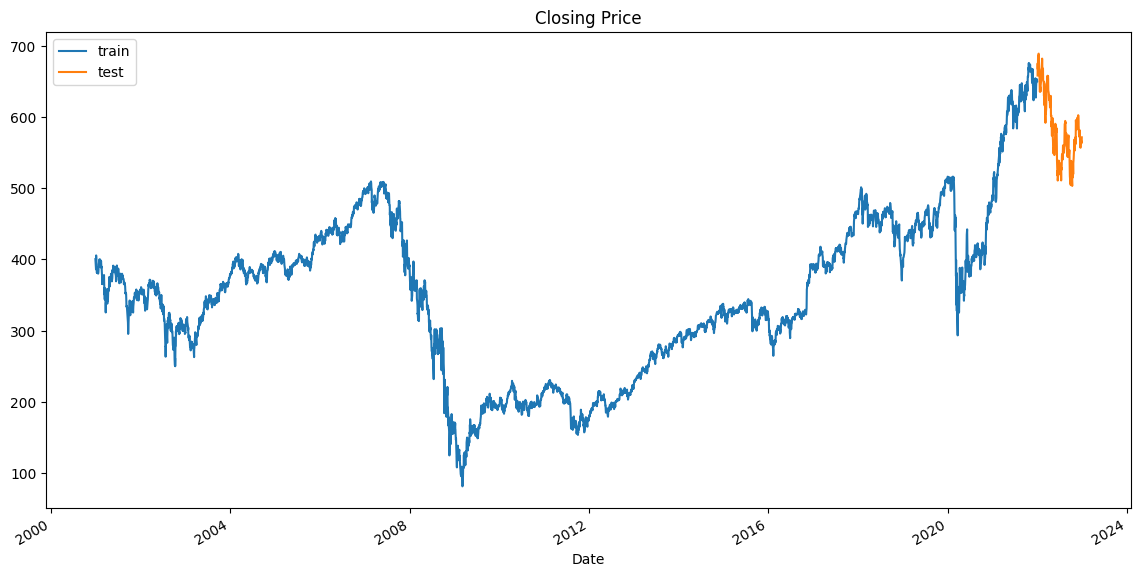

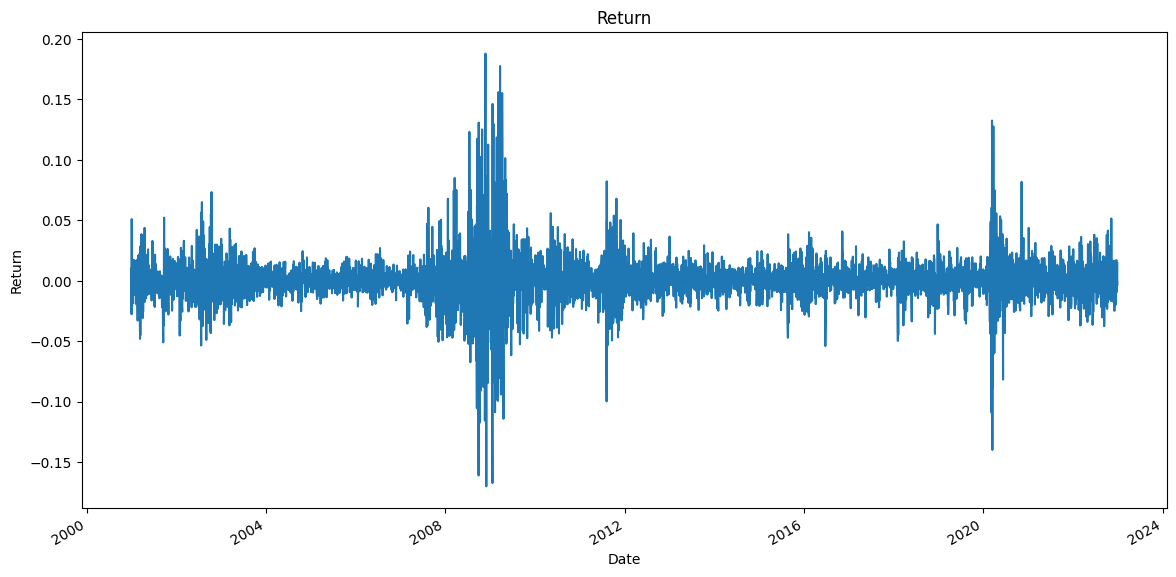

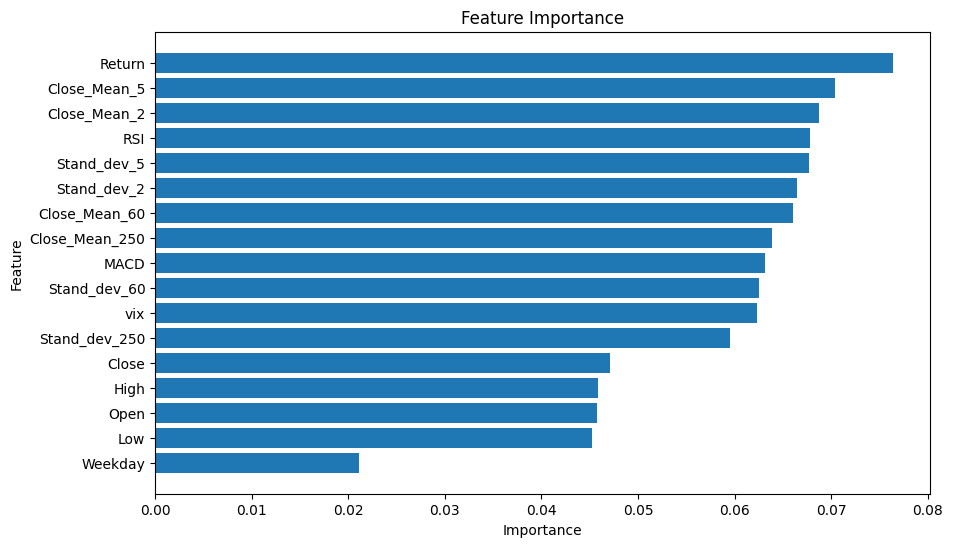

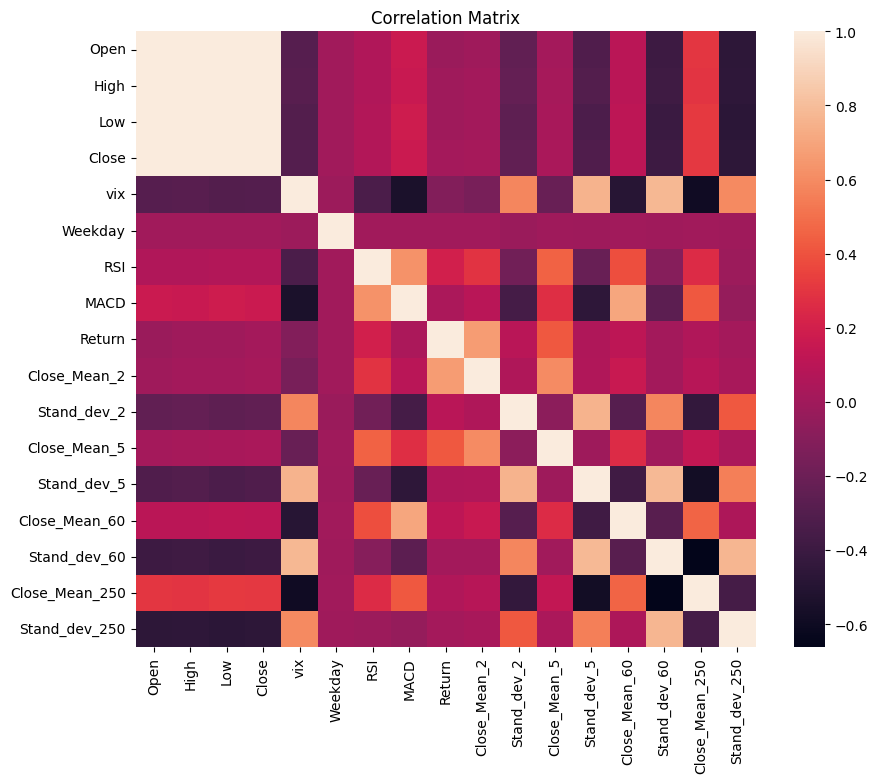

real number of days up 113
predicted day up : 17.0
precision score : 0.5294117647058824
Accuracy : 0.552


In [164]:
finace_model = train_test_model(finance)

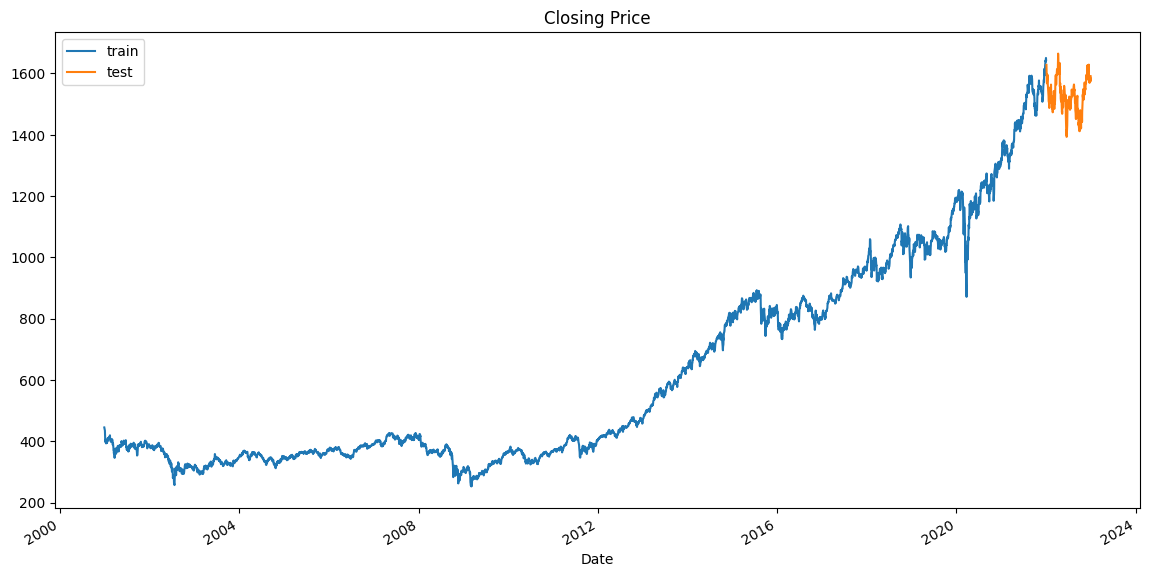

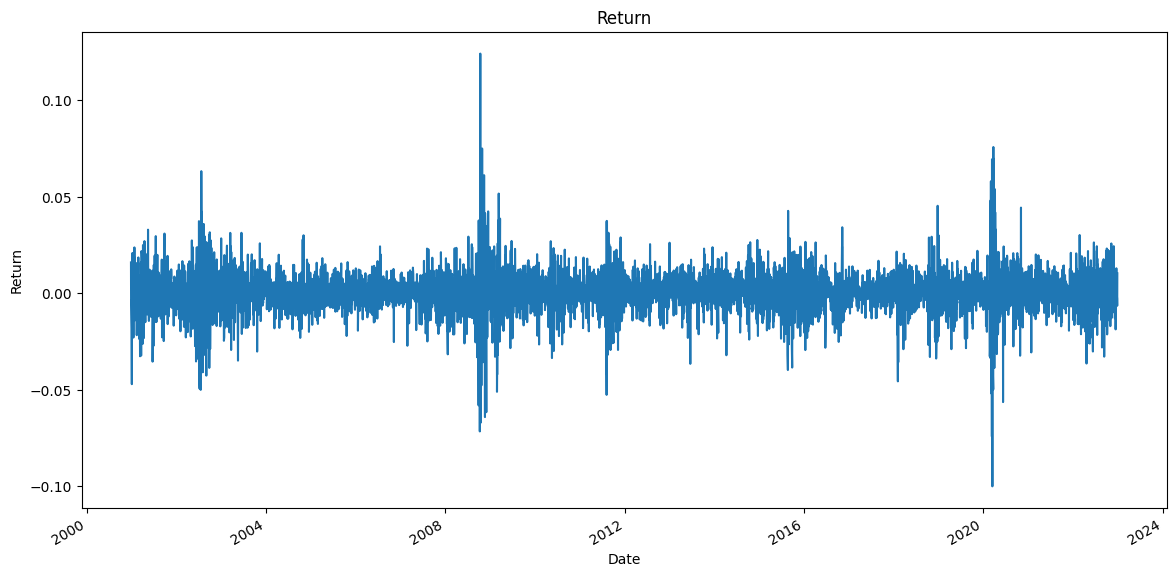

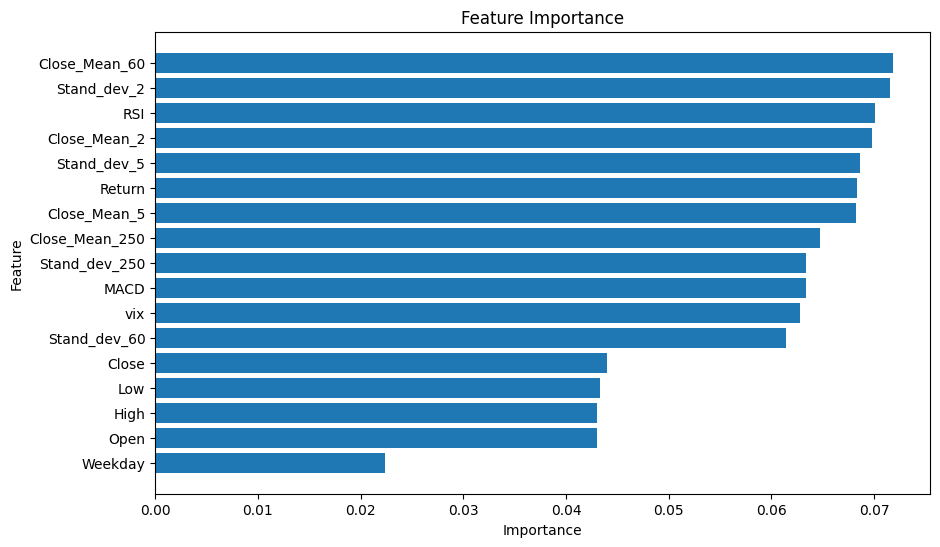

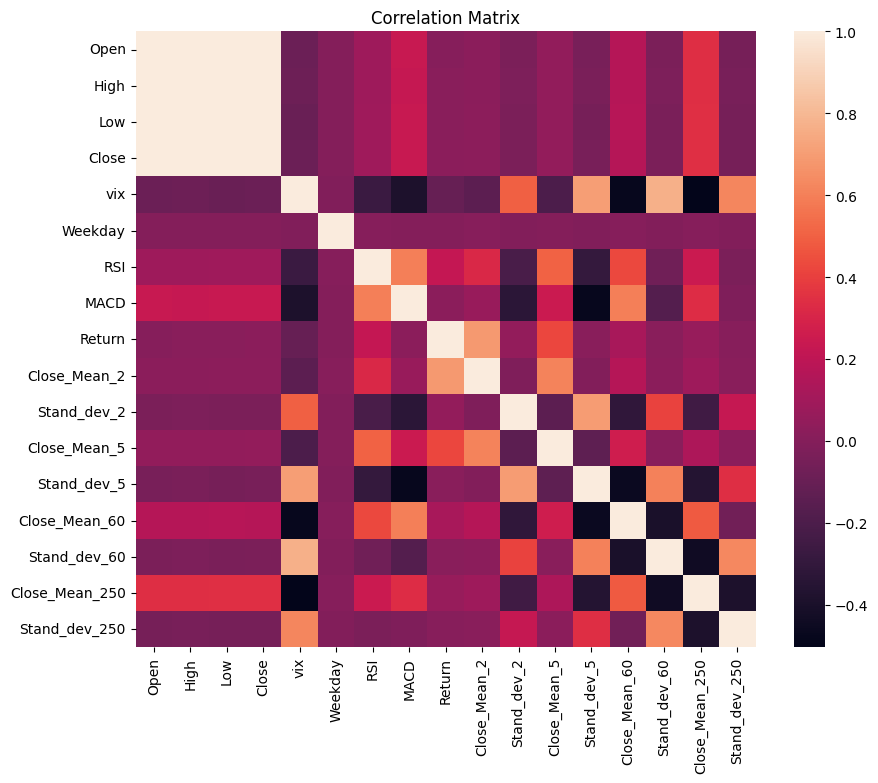

real number of days up 124
predicted day up : 28.0
precision score : 0.6428571428571429
Accuracy : 0.536


In [165]:
heath_model = train_test_model(health)

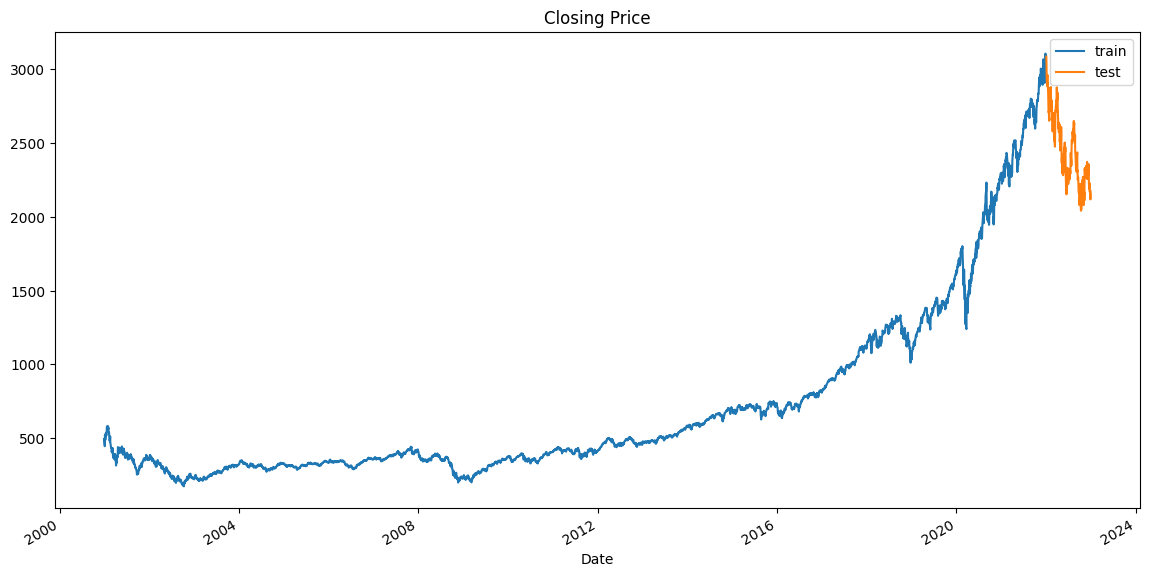

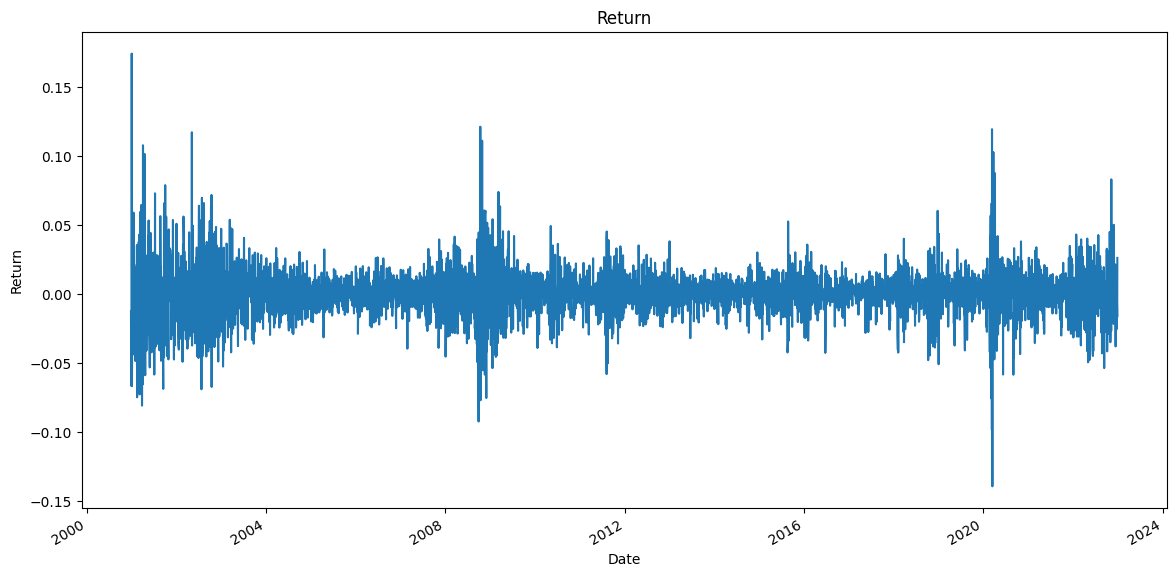

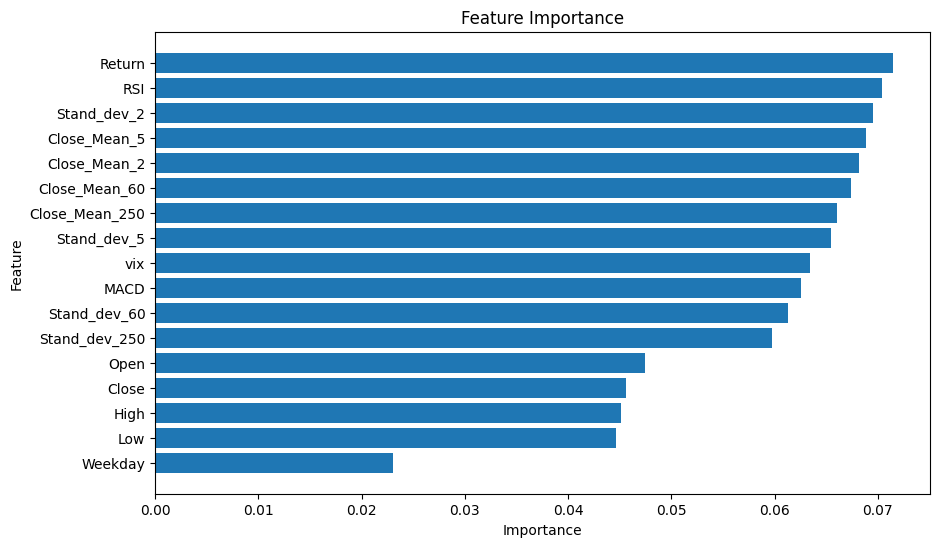

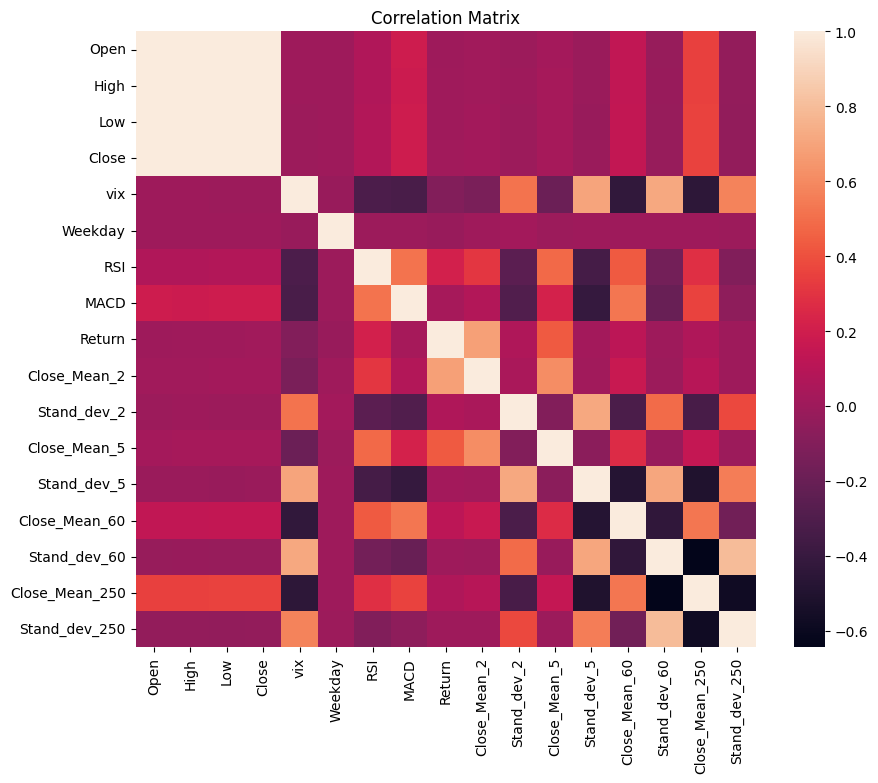

real number of days up 114
predicted day up : 93.0
precision score : 0.5698924731182796
Accuracy : 0.596


In [166]:
tech_model = train_test_model(tech)

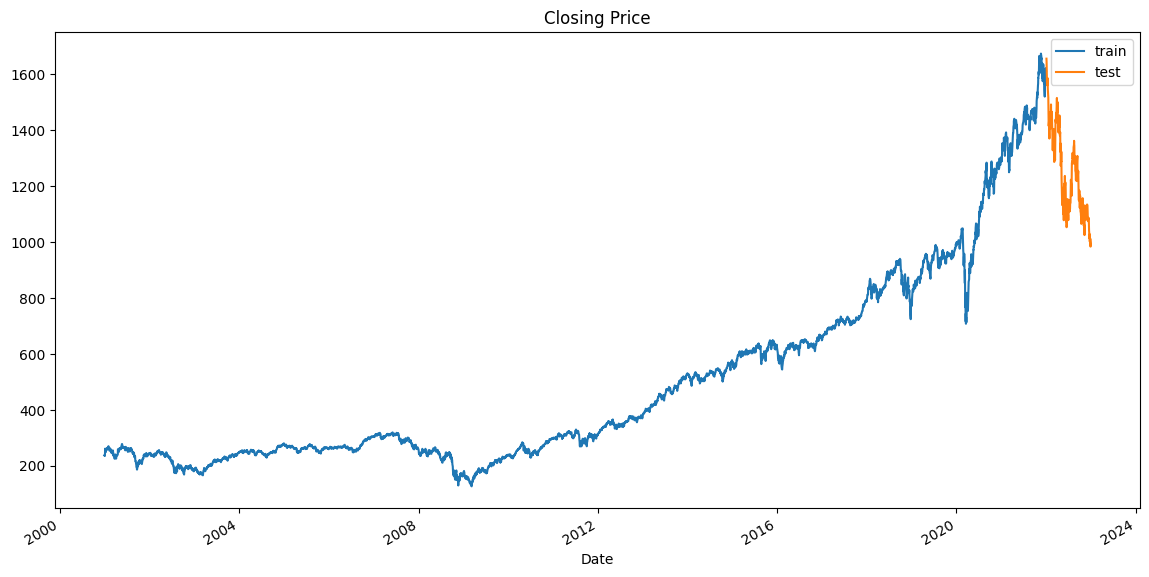

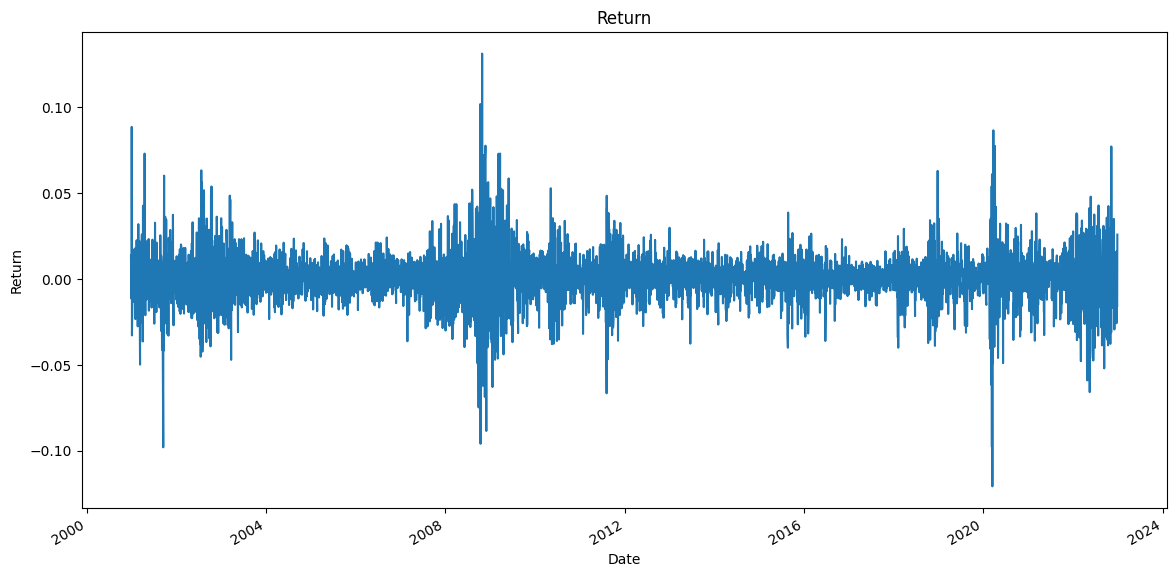

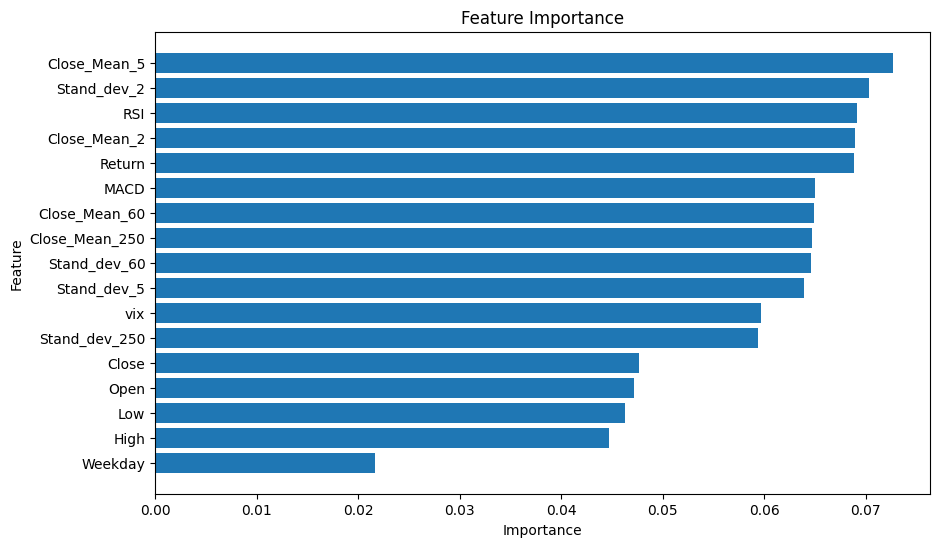

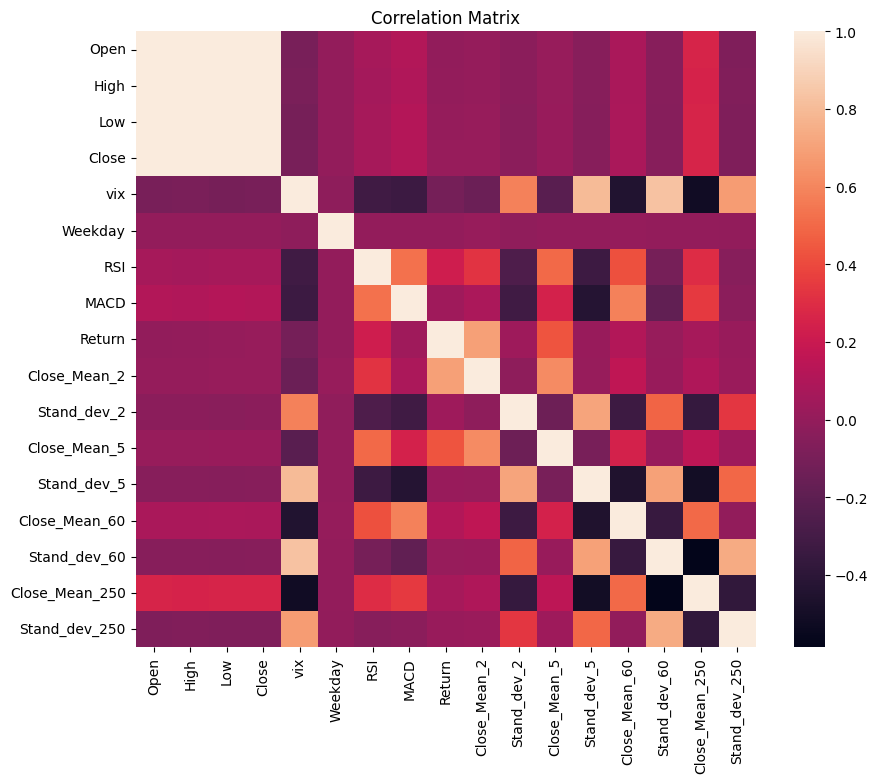

real number of days up 111
predicted day up : 90.0
precision score : 0.5
Accuracy : 0.556


In [167]:
disc_model = train_test_model(discr)

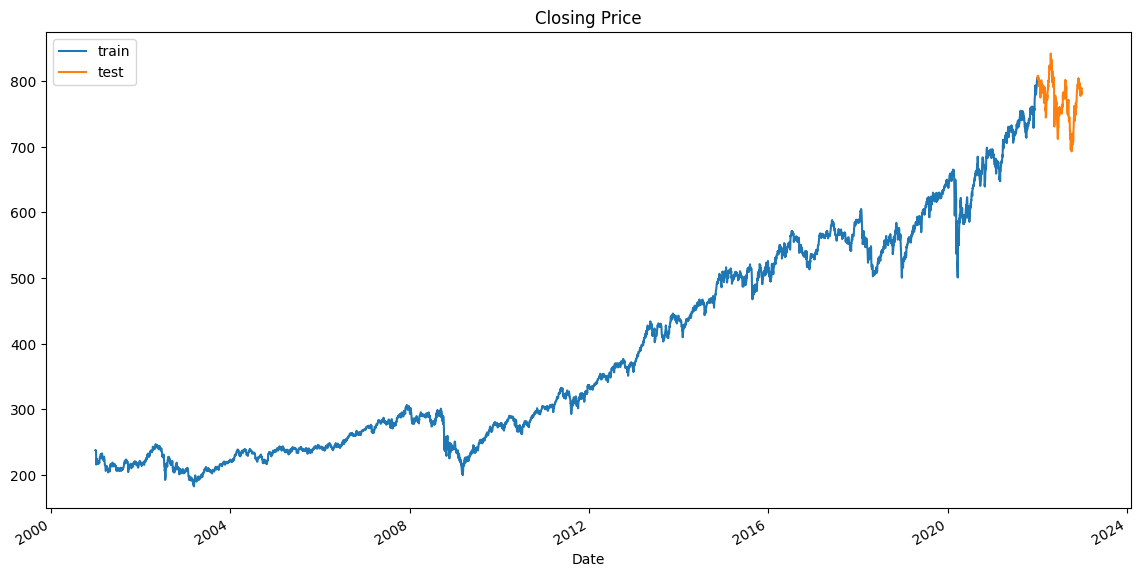

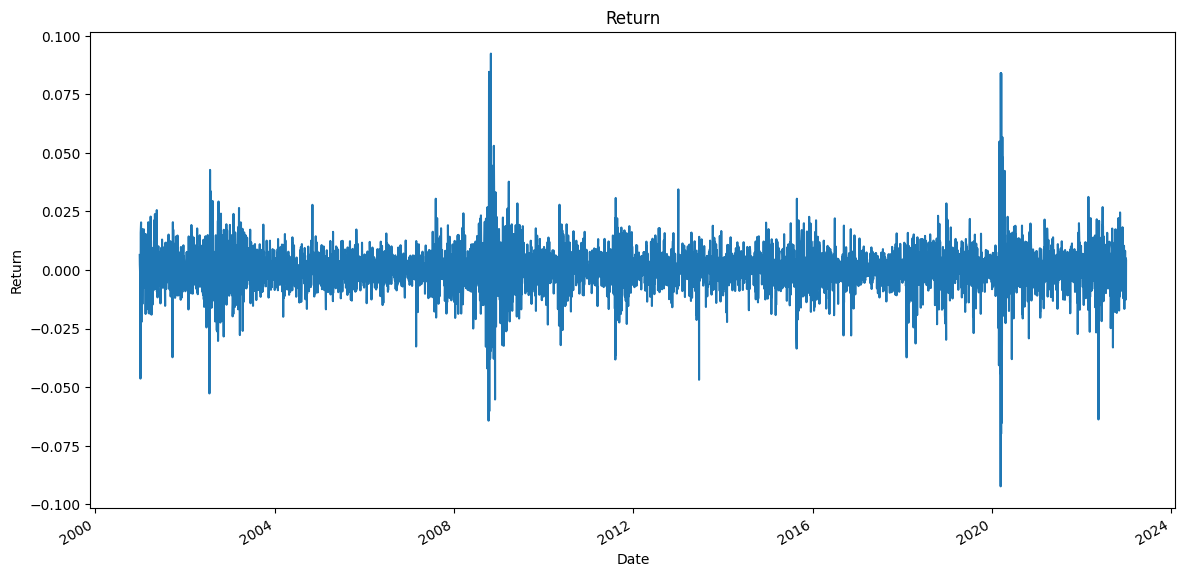

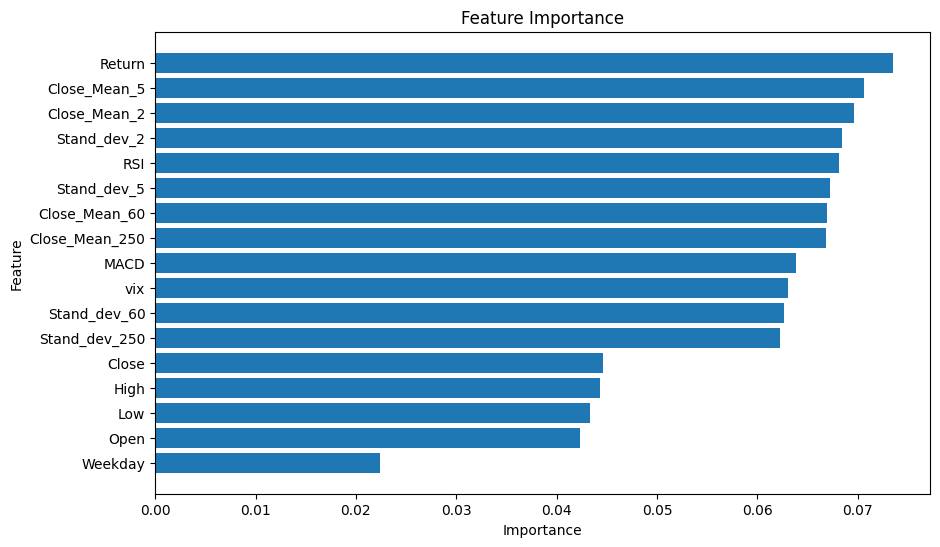

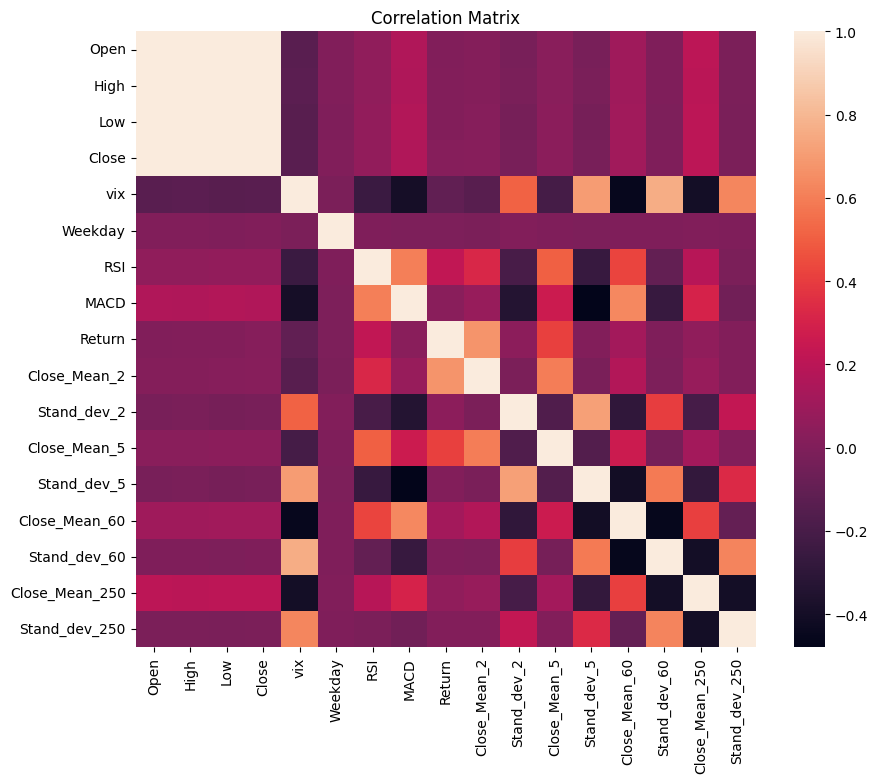

real number of days up 129
predicted day up : 38.0
precision score : 0.5263157894736842
Accuracy : 0.492


In [168]:
staples_model = train_test_model(staples)

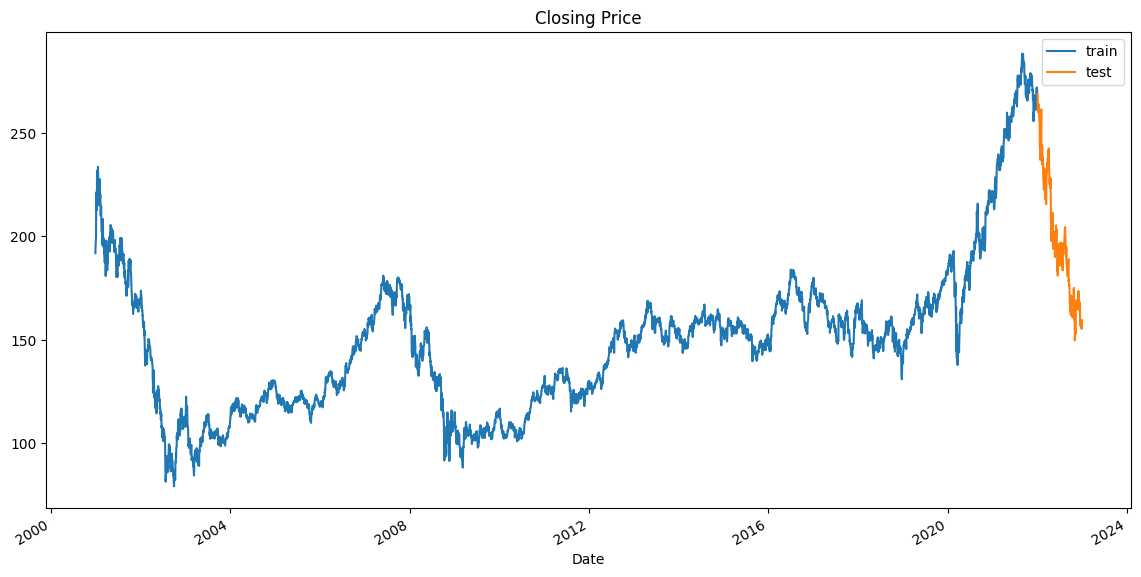

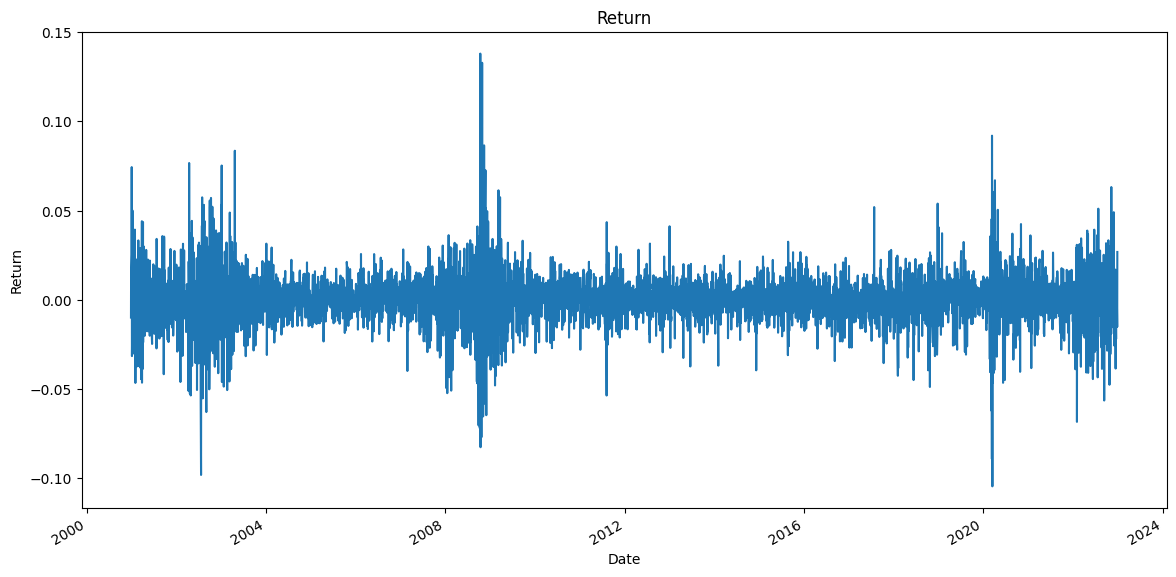

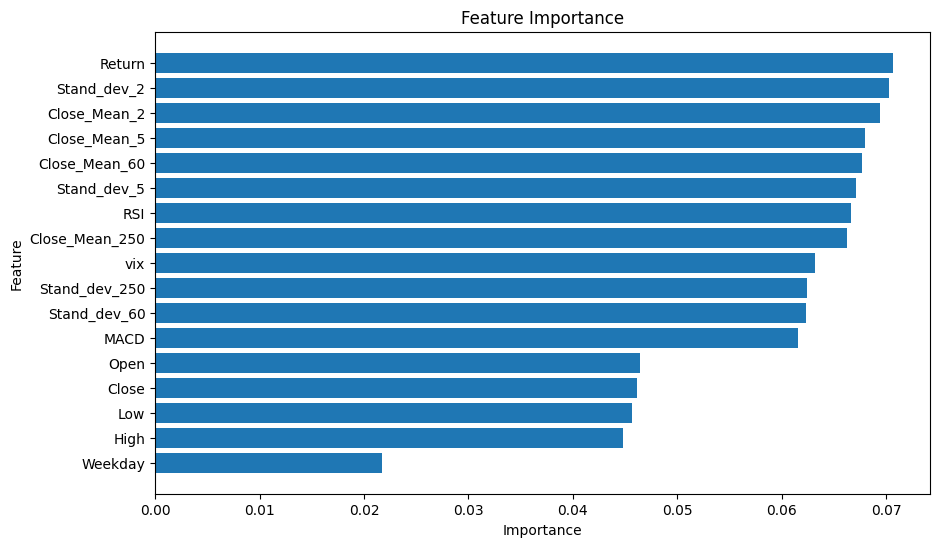

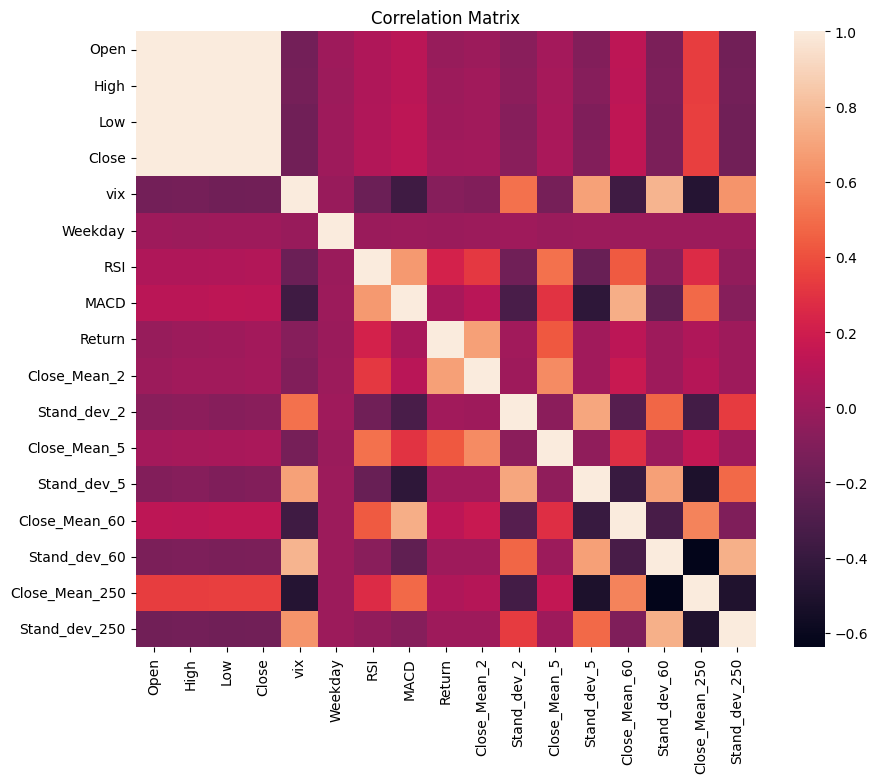

real number of days up 111
predicted day up : 35.0
precision score : 0.45714285714285713
Accuracy : 0.544


In [169]:
commu_model = train_test_model(commu)

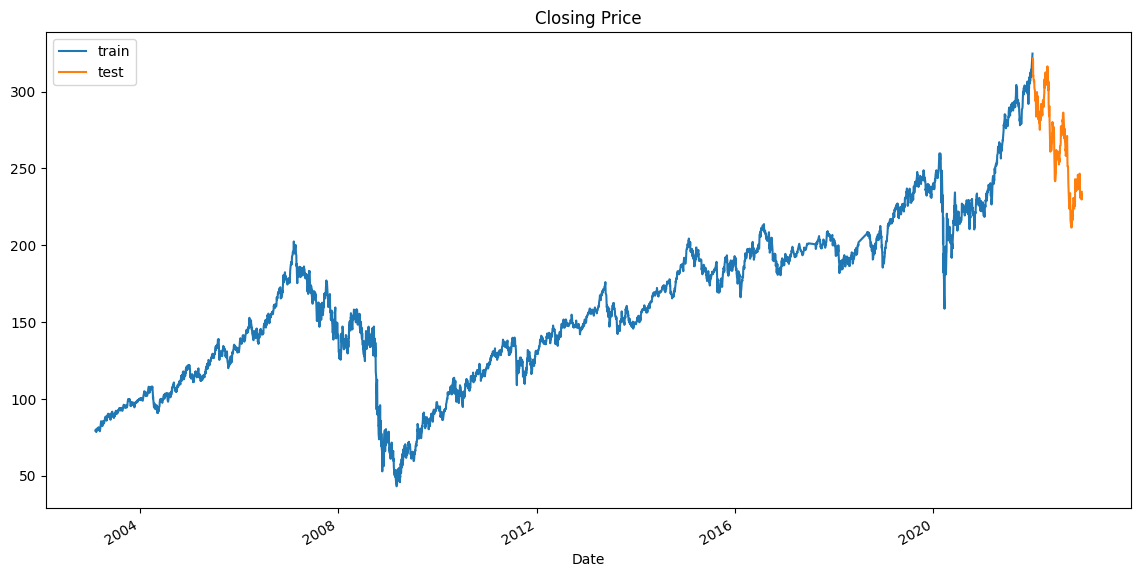

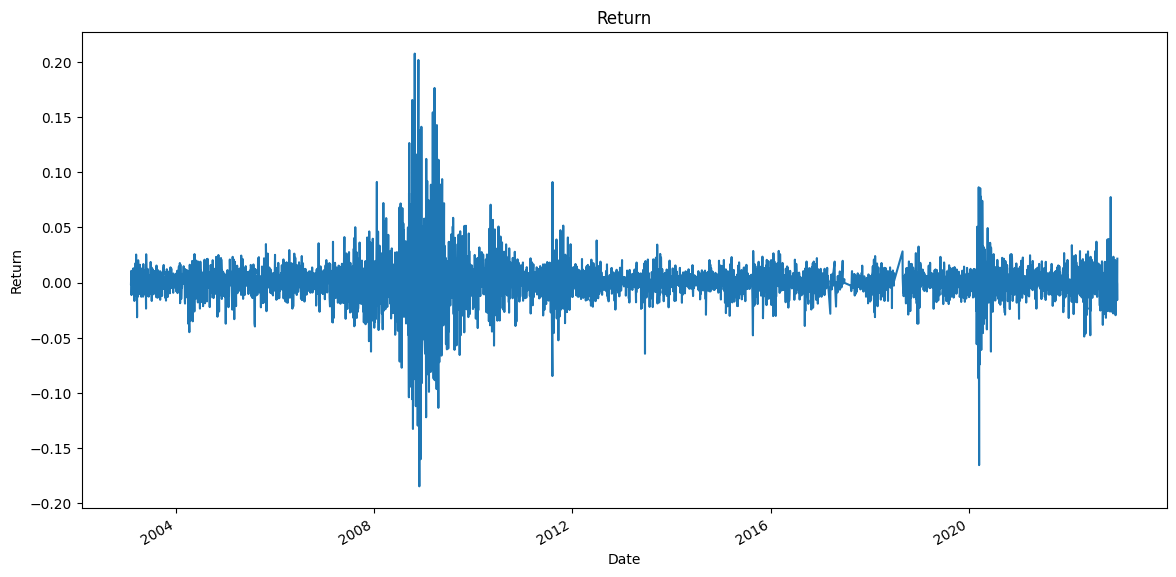

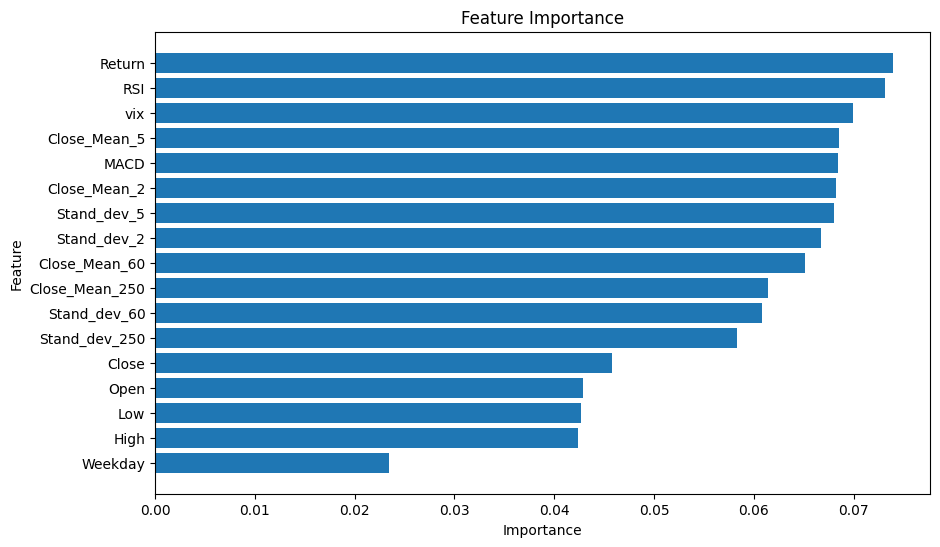

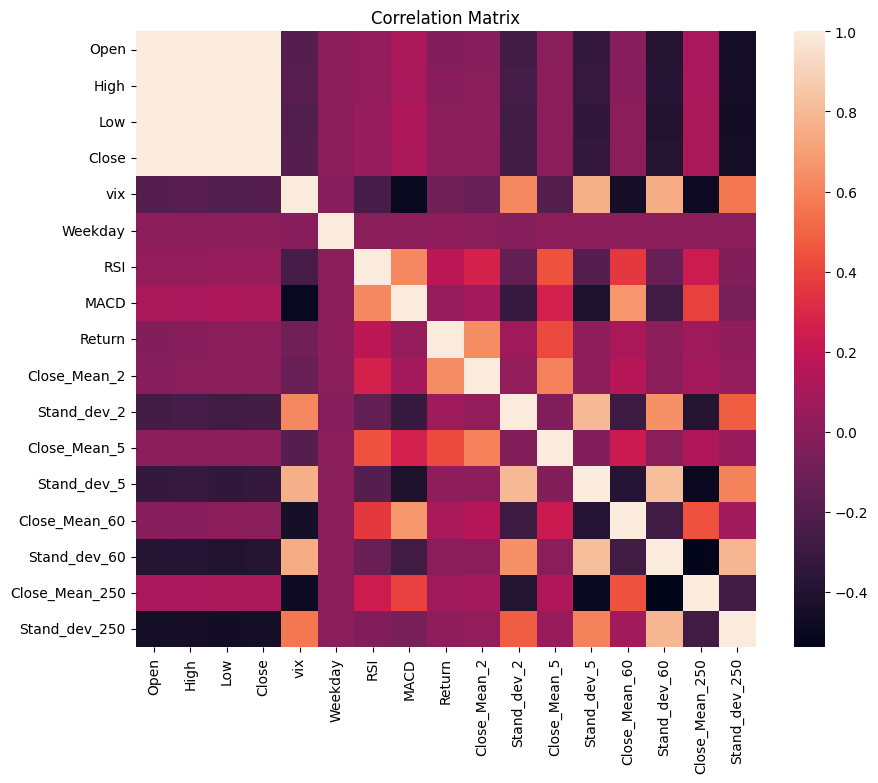

real number of days up 112
predicted day up : 41.0
precision score : 0.5121951219512195
Accuracy : 0.556


In [170]:
estate_model = train_test_model(estate)

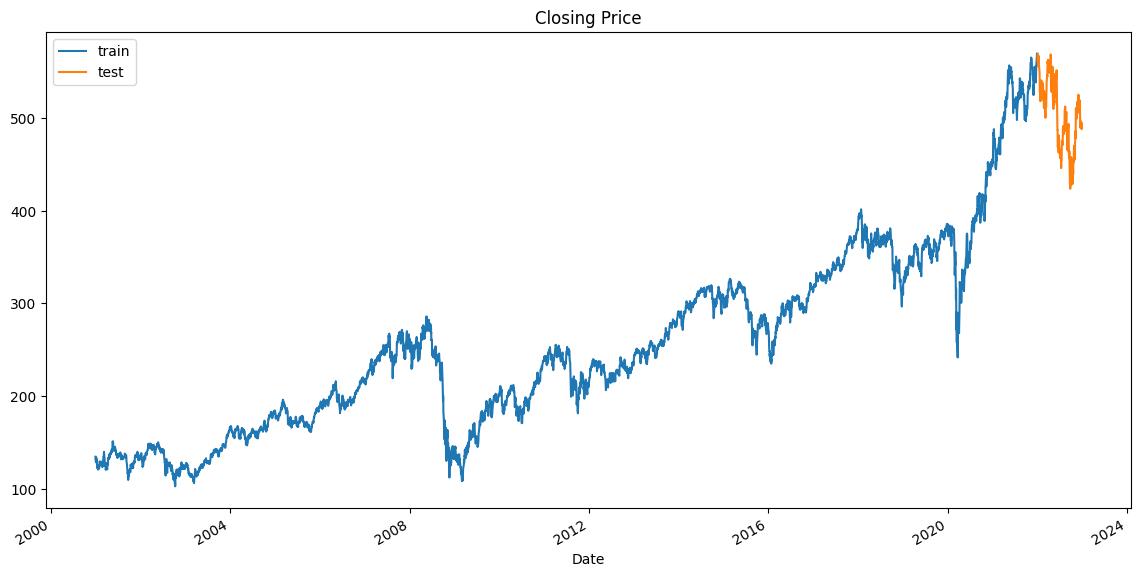

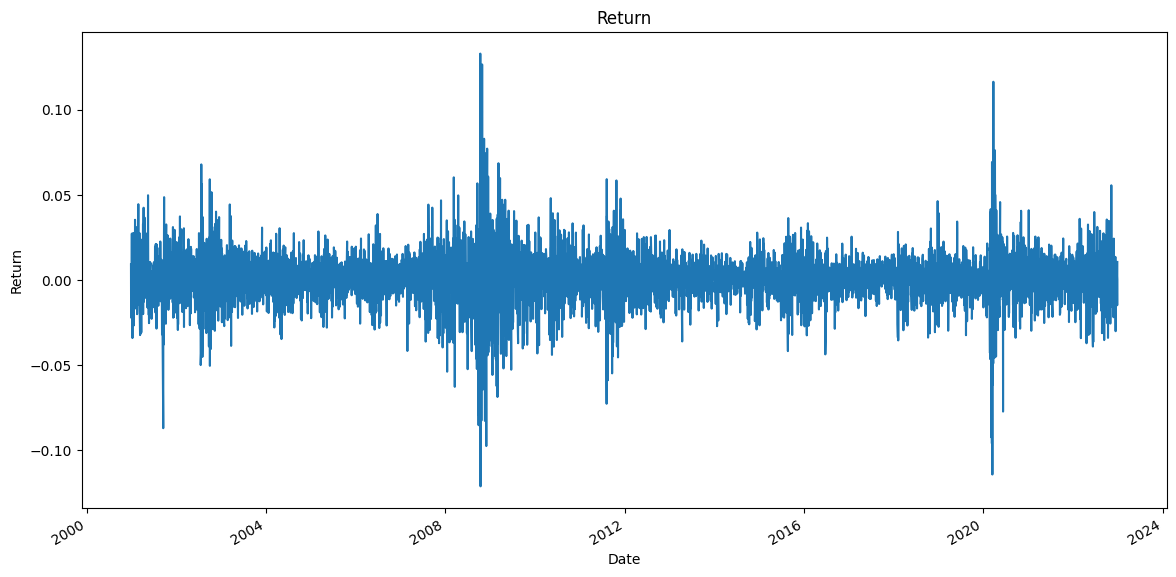

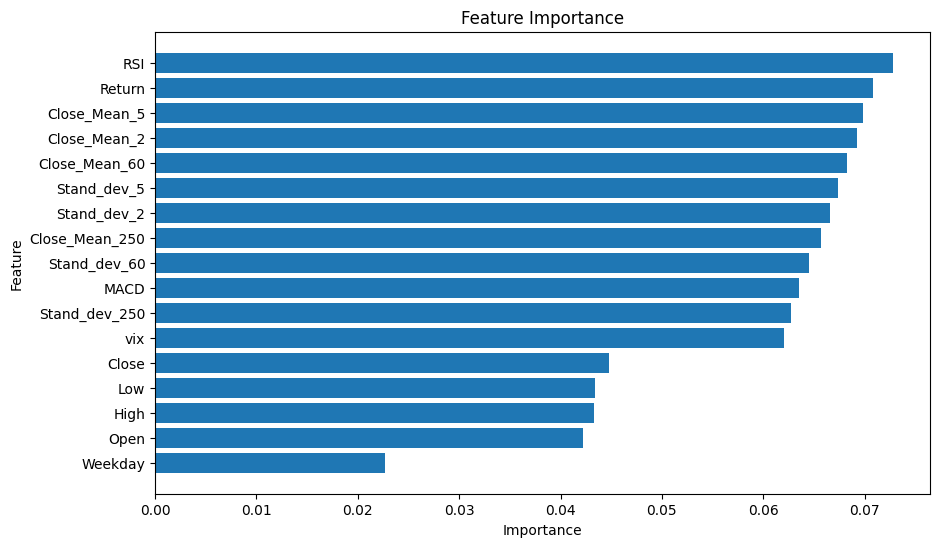

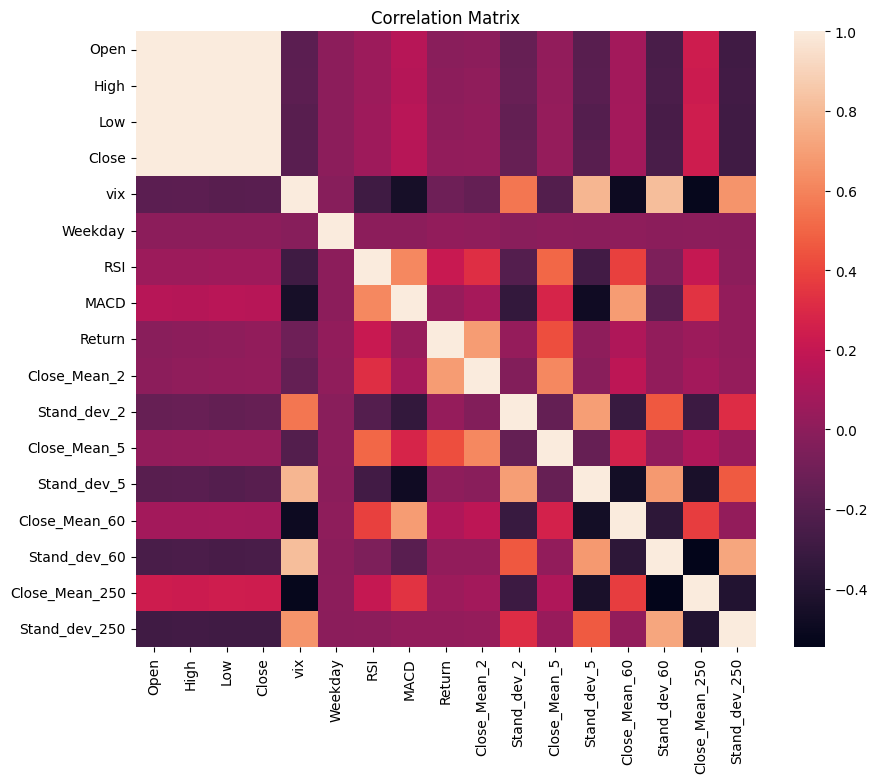

real number of days up 116
predicted day up : 8.0
precision score : 0.625
Accuracy : 0.544


In [171]:
mat_model = train_test_model(mat)

#Second step
Try to improuve the process by removing the 5 less important features, to only keep 12 instead of 17 feature and see the result

The result is worst that the fisrt step then we will ignore this part

In [172]:
def best_model(data) :
  hs = [2 , 5 , 60 , 250]

  for h in hs :
    rol_av = data.rolling(h).mean()
    mean_col = f'Close_Mean_{h}'
    data[mean_col] = rol_av['Return']

    stand_dev = data.rolling(h).std()
    st_col = f'Stand_dev_{h}'
    data[st_col] = stand_dev['Return']


  new_var = [ 'vix', 'Weekday', 'RSI', 'MACD', 'Return', 'Close_Mean_2',
       'Stand_dev_2', 'Close_Mean_5', 'Stand_dev_5', 'Close_Mean_60',
       'Stand_dev_60', 'Close_Mean_250', 'Stand_dev_250']

  data = data.dropna()

  train = data.iloc[:-250]
  test = data.iloc[-250 :]


  model.fit(train[new_var] , train['Target'])

  pred = model.predict_proba(test[new_var])[: , 1]
  pred[pred >= 0.6] = 1
  pred[pred < 0.6] = 0

  pred = pd.Series(pred , index=test.index)


  preci_score = precision_score(test['Target'] , pred )
  acc = accuracy_score(test['Target'] , pred)

  real = test['Target'].sum()
  trad = pred.sum()

  return  print(f'real number of days up {real}')  ,  print(f'predicted day up : {trad}') , print(f'precision score : {preci_score}') , print(f'Accuracy : {acc}')

In [173]:
'''
def best_model(data) :
  hs = [2 , 5 , 60 , 250]

  for h in hs :
    rol_av = data.rolling(h).mean()
    mean_col = f'Close_Mean_{h}'
    data[mean_col] = rol_av['Return']

    stand_dev = data.rolling(h).std()
    st_col = f'Stand_dev_{h}'
    data[st_col] = stand_dev['Return']


  new_var = ['Close', 'vix', 'Weekday', 'RSI', 'MACD', 'Return', 'Close_Mean_2',
       'Stand_dev_2', 'Close_Mean_5', 'Stand_dev_5', 'Close_Mean_60',
       'Stand_dev_60', 'Close_Mean_250', 'Stand_dev_250']

  data = data.dropna()

  train = data.iloc[:-250]
  test = data.iloc[-250 :]

  model.fit(train[new_var] , train['Target'])

  feature_importances = model.feature_importances_
  importances_df = pd.DataFrame({'feature': new_var, 'importances_df': feature_importances})
  optim_var = importances_df[importances_df['importances_df'] > 0.05]['feature'].tolist()


  model.fit(train[optim_var] , train['Target'])

  pred = model.predict_proba(test[optim_var])[: , 1]
  pred[pred >= 0.6] = 1
  pred[pred < 0.6] = 0

  pred = pd.Series(pred , index=test.index)


  preci_score = precision_score(test['Target'] , pred )
  acc = accuracy_score(test['Target'] , pred)

  real = test['Target'].sum()
  trad = pred.sum()

  return  print(f'real number of days up {real}')  ,  print(f'predicted day up : {trad}') , print(f'precision score : {preci_score}') , print(f'Accuracy : {acc}') , print(optim_var)
  '''

"\ndef best_model(data) :\n  hs = [2 , 5 , 60 , 250]\n\n  for h in hs :\n    rol_av = data.rolling(h).mean()\n    mean_col = f'Close_Mean_{h}'\n    data[mean_col] = rol_av['Return']\n\n    stand_dev = data.rolling(h).std()\n    st_col = f'Stand_dev_{h}'\n    data[st_col] = stand_dev['Return']\n\n\n  new_var = ['Close', 'vix', 'Weekday', 'RSI', 'MACD', 'Return', 'Close_Mean_2',\n       'Stand_dev_2', 'Close_Mean_5', 'Stand_dev_5', 'Close_Mean_60',\n       'Stand_dev_60', 'Close_Mean_250', 'Stand_dev_250']\n\n  data = data.dropna()\n\n  train = data.iloc[:-250]\n  test = data.iloc[-250 :] \n\n  model.fit(train[new_var] , train['Target'])\n\n  feature_importances = model.feature_importances_\n  importances_df = pd.DataFrame({'feature': new_var, 'importances_df': feature_importances})\n  optim_var = importances_df[importances_df['importances_df'] > 0.05]['feature'].tolist()\n\n\n  model.fit(train[optim_var] , train['Target'])\n\n  pred = model.predict_proba(test[optim_var])[: , 1]\n  pred[

In [174]:
best_model(energy)

real number of days up 141
predicted day up : 20.0
precision score : 0.55
Accuracy : 0.444


(None, None, None, None)

In [175]:
best_model(finance)

real number of days up 113
predicted day up : 23.0
precision score : 0.34782608695652173
Accuracy : 0.52


(None, None, None, None)

In [176]:
best_model(health)

real number of days up 124
predicted day up : 33.0
precision score : 0.5151515151515151
Accuracy : 0.508


(None, None, None, None)

In [177]:
best_model(tech)

real number of days up 114
predicted day up : 70.0
precision score : 0.5
Accuracy : 0.544


(None, None, None, None)

In [178]:
best_model(discr)

real number of days up 111
predicted day up : 77.0
precision score : 0.4675324675324675
Accuracy : 0.536


(None, None, None, None)

In [179]:
best_model(staples)

real number of days up 129
predicted day up : 25.0
precision score : 0.48
Accuracy : 0.48


(None, None, None, None)

In [180]:
best_model(commu)

real number of days up 111
predicted day up : 34.0
precision score : 0.5588235294117647
Accuracy : 0.572


(None, None, None, None)

In [181]:
best_model(estate)

real number of days up 112
predicted day up : 72.0
precision score : 0.5
Accuracy : 0.552


(None, None, None, None)

In [182]:
best_model(mat)

real number of days up 116
predicted day up : 40.0
precision score : 0.525
Accuracy : 0.544


(None, None, None, None)

#Third Step

After notice that the Tech sector had better resuts compare to other, The goal is now to train the model only in Tech sector and test it in the other sectors and see the resuts

We have have in overall the best result. The model only trained in tech sectors and test in the other have a better over all result.

In [183]:
#Gonna train the model only on tech cause he has a better restult and test it on the other sector

t_model = RandomForestClassifier(n_estimators=100 , min_samples_split=10, random_state=42  )

In [184]:
tech.dropna(inplace=True)

tech

,Open,High,Low,Close,Adj Close,Volume,Tomorrow,Target,vix,Weekday,...,MACD,Return,Close_Mean_2,Stand_dev_2,Close_Mean_5,Stand_dev_5,Close_Mean_60,Stand_dev_60,Close_Mean_250,Stand_dev_250
Date,,,,,,,,,,,,,,,,,,,,,
2000-12-28,493.619995,493.619995,493.619995,493.619995,493.596130,0,476.640015,0,26.570000,4,...,-32.171964,-0.012227,-0.000027,0.017253,0.013063,0.036494,-0.004858,0.039481,-0.001620,0.030220
2000-12-29,476.640015,476.640015,476.640015,476.640015,476.616974,0,444.920013,0,26.850000,5,...,-32.650432,-0.034399,-0.023313,0.015678,0.005109,0.042439,-0.005914,0.039408,-0.001537,0.030101
2001-01-02,444.920013,444.920013,444.920013,444.920013,444.898499,0,522.520020,1,29.990000,2,...,-35.183585,-0.066549,-0.050474,0.022734,-0.023205,0.029339,-0.006804,0.040170,-0.001761,0.030375
2001-01-03,522.520020,522.520020,522.520020,522.520020,522.494751,0,522.950012,1,26.600000,3,...,-30.576983,0.174413,0.053932,0.170386,0.014682,0.093877,-0.003495,0.046411,-0.000905,0.032261
2001-01-04,522.950012,522.950012,522.950012,522.950012,522.924744,0,488.230011,0,26.969999,4,...,-26.585065,0.000823,0.087618,0.122747,0.012412,0.094090,-0.003379,0.046413,-0.000968,0.032242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-22,2229.679932,2229.679932,2136.860107,2173.040039,2173.040039,556729200,2175.540039,1,21.969999,4,...,-15.920364,-0.025403,-0.004322,0.029812,-0.006783,0.016277,0.000202,0.023234,-0.001213,0.020876
2022-12-23,2173.040039,2177.379883,2142.250000,2175.540039,2175.540039,327810900,2154.379883,0,20.870001,5,...,-20.329536,0.001150,-0.012126,0.018776,-0.004016,0.016198,0.000678,0.022949,-0.001185,0.020875
2022-12-27,2175.540039,2175.540039,2142.320068,2154.379883,2154.379883,351833800,2118.969971,0,21.650000,2,...,-25.240330,-0.009726,-0.004288,0.007691,-0.003131,0.015617,0.000840,0.022839,-0.001227,0.020881


In [185]:
tech.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Tomorrow',
       'Target', 'vix', 'Weekday', 'RSI', 'MACD', 'Return', 'Close_Mean_2',
       'Stand_dev_2', 'Close_Mean_5', 'Stand_dev_5', 'Close_Mean_60',
       'Stand_dev_60', 'Close_Mean_250', 'Stand_dev_250'],
      dtype='object')

In [186]:
t_train = tech.iloc[:-250]
t_test = tech.iloc[-250:]

new_var = ['Open', 'High', 'Low', 'Close', 'vix', 'Weekday', 'RSI', 'MACD', 'Return', 'Close_Mean_2',
       'Stand_dev_2', 'Close_Mean_5', 'Stand_dev_5', 'Close_Mean_60',
       'Stand_dev_60', 'Close_Mean_250', 'Stand_dev_250']

t_model.fit(t_train[new_var] , t_train['Target'])

tpred = t_model.predict_proba(t_test[new_var])[: , 1]
tpred[tpred >= 0.6] = 1
tpred[tpred < 0.6] = 0

tpred = pd.Series(tpred , index=t_test.index)

tpreci_score = precision_score(t_test['Target'] , tpred )
tacc = accuracy_score(t_test['Target'] , tpred)

treal = t_test['Target'].sum()
trad = tpred.sum()

print(f'real number of days up {treal}')
print(f'predicted day up : {trad}')
print(f'precision score : {tpreci_score}')
print(f'Accuracy : {tacc}')

real number of days up 114
predicted day up : 93.0
precision score : 0.5698924731182796
Accuracy : 0.596


In [187]:
t_model = RandomForestClassifier(n_estimators=100 , min_samples_split=10, random_state=42  )

t_train = tech.iloc[:-250]
t_test = tech.iloc[-250:]

new_var = ['Open', 'High', 'Low', 'Close', 'vix', 'Weekday', 'RSI', 'MACD', 'Return', 'Close_Mean_2',
       'Stand_dev_2', 'Close_Mean_5', 'Stand_dev_5', 'Close_Mean_60',
       'Stand_dev_60', 'Close_Mean_250', 'Stand_dev_250']

t_model.fit(t_train[new_var] , t_train['Target'])

def tech_model(data) :
  data.dropna(inplace=True)
  t_train = data.iloc[:-250]
  t_test = data.iloc[-250:]
  data = data.iloc[-250:]

  new_var = ['Open', 'High', 'Low', 'Close', 'vix', 'Weekday', 'RSI', 'MACD', 'Return', 'Close_Mean_2',
       'Stand_dev_2', 'Close_Mean_5', 'Stand_dev_5', 'Close_Mean_60',
       'Stand_dev_60', 'Close_Mean_250', 'Stand_dev_250']


  prediction = t_model.predict_proba(data[new_var])[: , 1]
  prediction[prediction >= 0.6] = 1
  prediction[prediction < 0.6] = 0

  prediction = pd.Series(prediction , index=t_test.index)

  preci_score = precision_score(t_test['Target'] , prediction )
  accuracy = accuracy_score(t_test['Target'] , prediction)

  reality = t_test['Target'].sum()
  comparison = prediction.sum()

  return print(f'real number of days up {reality}')  , print(f'predicted day up : {comparison}')  , print(f'precision score : {preci_score}')  , print(f'Accuracy : {accuracy}')

In [188]:
print('energy')
tech_model(energy)
print('finance')
tech_model(finance)
print('health')
tech_model(health)
print('tech')
tech_model(tech)
print('discr')
tech_model(discr)
print('staples')
tech_model(staples)
print('commu')
tech_model(commu)
print('estate')
tech_model(estate)
print('mat')
tech_model(mat)

energy
real number of days up 141
predicted day up : 25.0
precision score : 0.48
Accuracy : 0.432
finance
real number of days up 113
predicted day up : 48.0
precision score : 0.5625
Accuracy : 0.572
health
real number of days up 124
predicted day up : 92.0
precision score : 0.5434782608695652
Accuracy : 0.536
tech
real number of days up 114
predicted day up : 93.0
precision score : 0.5698924731182796
Accuracy : 0.596
discr
real number of days up 111
predicted day up : 102.0
precision score : 0.4215686274509804
Accuracy : 0.492
staples
real number of days up 129
predicted day up : 53.0
precision score : 0.5660377358490566
Accuracy : 0.512
commu
real number of days up 111
predicted day up : 51.0
precision score : 0.5294117647058824
Accuracy : 0.568
estate
real number of days up 112
predicted day up : 106.0
precision score : 0.4339622641509434
Accuracy : 0.496
mat
real number of days up 116
predicted day up : 40.0
precision score : 0.6
Accuracy : 0.568


(None, None, None, None)